array([[<AxesSubplot:title={'center':'count of string audio'}>]],
      dtype=object)

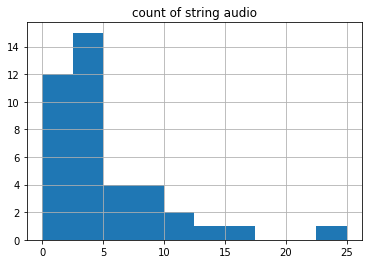

In [18]:
#import time
#from bs4 import BeautifulSoup
#from selenium import webdriver
##copy chromedriver into python folder
#driver = webdriver.Chrome(executable_path='/home/alberto/insight_project/notebooks/chromedriver')
#driver.set_window_position(-2000,0)#this function will minimize the window
#first_url = 1
#last_url = 10000     # Last book is 8,630,000



#for book_reference_number in range(first_url, last_url):
#    driver.get("https://www.goodreads.com/book/show/"+str(book_reference_number))
#    #time.sleep(2)#optional
#    soup = BeautifulSoup(driver.page_source, 'lxml')
#    try:
#        book_title = soup.select('.gr-h1.gr-h1--serif')[0].text.strip()
#    except:
#        book_title = ''
#    try:
#        author_name = soup.select('.authorName')[0].text.strip()
#    except:
##        author_name = ''
#
#    print('NO.', book_reference_number, 'TITLE: ', book_title, 'AUTHOR: ', author_name) 

import pandas as pd

pd.read_csv('count_audio.csv').hist()
